SENTIMENT ANALYSIS FOR MONEY LAUNDERING 

In [ ]:
pip install pandas nltk openpyx1 textblob

In [ ]:
pip install textblob

In [ ]:
pip install openpyxl

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install wordcloud

In [ ]:
pip install spacy

In [5]:
#Import to visualize the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [30]:
#Read excel file into DataFrame
#Load - 'nstMoneyLaundering1.xlsx' in df
df = pd.read_excel('nstMoneyLaundering1.xlsx')

In [31]:
#Display DataFrame
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...


In [8]:
#Data Cleaning
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Preprocess the text data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df ['Long-text'].apply(preprocess_text)    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Display stop word list
stop_words

In [9]:
#Perform sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_textblob(text) :
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def analyze_sentiment_vader(text) :
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    return compound_score

df['sentiment_textblob'] = df['clean_text'].apply(analyze_sentiment_textblob)
df['sentiment_vader'] = df['clean_text'].apply(analyze_sentiment_vader)

In [10]:
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,clean_text,sentiment_textblob,sentiment_vader
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,statement party said practice used tarnish peo...,0.093889,0.9774
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,deputy public prosecutor noralis mat rasyidah ...,-0.053205,-0.9079
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,sentenced seven years jail received two stroke...,0.046667,-0.6461
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,said threats offer bribes happened affected pa...,0.061270,0.8957
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,sparked hope especially younger generation saw...,0.044567,0.9657


In [ ]:
# Analyze & Visualize the results
print(df['sentiment_textblob']) # +1 positive review , -1 negative review , 0 neutral review
print(df['sentiment_vader'])

In [6]:
#check table
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,clean_text,sentiment_textblob,sentiment_vader
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,statement party said practice used tarnish peo...,0.093889,0.9774
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,deputy public prosecutor noralis mat rasyidah ...,-0.053205,-0.9079
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,sentenced seven years jail received two stroke...,0.046667,-0.6461
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,said threats offer bribes happened affected pa...,0.061270,0.8957
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,sparked hope especially younger generation saw...,0.044567,0.9657


Creating WordCloud for Word Frequency based on 'clean_text'

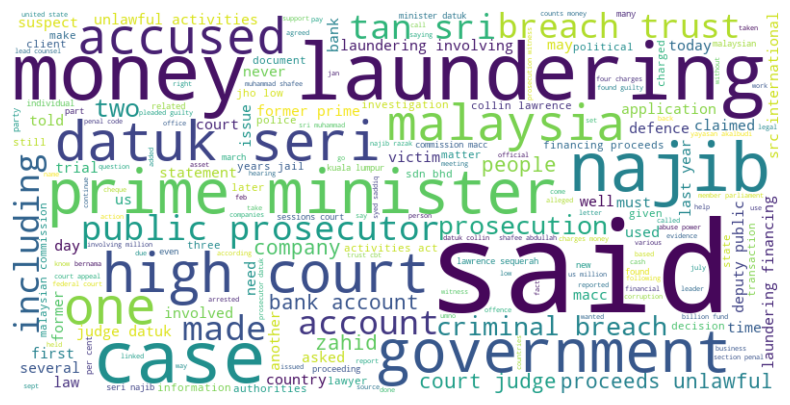

In [5]:
from wordcloud import WordCloud

#Step 1 combine text data into single string
text_data = ' '.join(df['clean_text'].astype(str))

#Step 2 generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#Step 3 : Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
#Count word frequency for clean text
def count_word_frequency(sentence_column):
    # Combine all sentences into a single string
    all_text = ' '.join(sentence_column.astype(str))

    # Split the text into words
    words = all_text.split()

    # Create a DataFrame to store the word frequencies
    word_freq_df = pd.DataFrame({'Word': words})

    # Count the occurrences of each word
    word_counts = word_freq_df['Word'].value_counts().reset_index()

    # Rename the columns for clarity
    word_counts.columns = ['Word', 'Frequency']

    # Sort the DataFrame by word frequency in descending order (High to Low)
    sorted_word_counts = word_counts.sort_values(by='Frequency', ascending=False)

    return sorted_word_counts

wordFreq_df = count_word_frequency(df['clean_text'])

# Display the result
print(wordFreq_df)


            Word  Frequency
0           said       3481
1          court       1894
2          money       1682
3           also       1608
4          najib       1342
...          ...        ...
11123   quandary          1
11122      minus          1
11121    smiling          1
11120    instant          1
14993  zeebrugge          1

[14994 rows x 2 columns]


In [21]:
#Raw file of list names into Excel
wordFreq_df.to_excel('nstMLWordFreq.xlsx', index=False)

In [26]:
#Raw file of list names into csv
wordFreq_df.to_csv('nstMLWordFreq.csv', index=False)

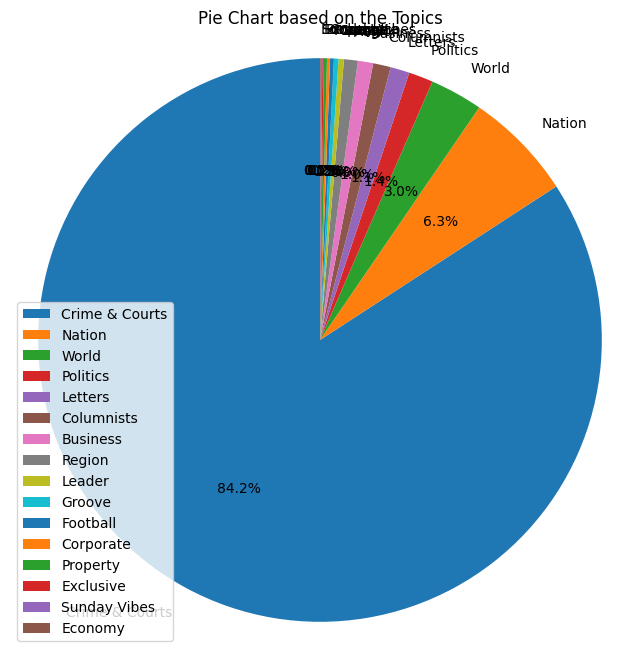

In [20]:
#Create a pie chart based on the Topics
#Function to count words in column
def count_words(text):
    words = text.split()
    return len(words)

df['word_count'] = df['Topics'].apply(count_words)

#Group by topics and sum the word counts
topic_word_counts = df.groupby('Topics')['word_count'].sum().reset_index()

# Sort the DataFrame based on the word counts
topic_word_counts = topic_word_counts.sort_values(by = 'word_count', ascending=False)

# Drop intermediate 'word_count' column if needed
df = df.drop(columns=['word_count'])


#Plot the pie chart - display all topics & percentage
plt.figure(figsize=(8, 8))
plt.pie(topic_word_counts['word_count'], labels=topic_word_counts['Topics'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart based on the Topics')
plt.legend(labels=topic_word_counts['Topics'], loc='best')
plt.axis('equal')
plt.show()


In [9]:
print(topic_word_counts)

            Topics  word_count
3   Crime & Courts        1920
10          Nation         143
15           World          69
11        Politics          32
9          Letters          25
1       Columnists          23
0         Business          20
13          Region          18
8           Leader           7
7           Groove           6
6         Football           5
2        Corporate           4
12        Property           4
5        Exclusive           2
14    Sunday Vibes           2
4          Economy           1


Data Extraction for 'names' using SpaCy

In [12]:
#import libraries
import spacy
import en_core_web_sm

spacy.cli.download("en_core_web_sm")

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to extract names from text using spaCy
def extract_names(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return names

# Apply the extract_names function to create a new 'names' column
df['names'] = df['Long-text'].apply(extract_names)

# Display the DataFrame
print(df)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
                                                  URL           Topics  \
0    https://www.nst.com.my/news/politics/2023/11/9...        Politics   
1    https://www.nst.com.my/news/crime-courts/2023/...  Crime & Courts   
2    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
3    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
4    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
..                                                 ...             ...   
995  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
996  https://www.nst.com.my/world/world/2019/10/533...           World   
997  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
998  https://www.nst.com.my/world/region/2019/10/53...          Region   
999  https://www.nst.com.my/world/world/2019/10/533...           World   

          

In [9]:
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,extracted_words,name_EW
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,A Syed Saddiq Syed Abdul Rahman This Muda Syed...,"[Abdul Rahman, Abd Aziz Meanwhile Muda As Muda]"
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,Deputy Noralis Mat Rasyidah Azmi Kalai Attorne...,[Noralis Mat]
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,He The Muda Malaysian In Emphasising Prime Min...,"[Datuk Seri, Anwar Ibrahim, Zii Jia We]"
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,He He Prime Minister Cabinet Members Parliamen...,"[Nordic Day Celebration, Abdul Khalid Kuala Ka..."
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,He The The Muda Syed Saddiq Nusantara Academy ...,"[Parameswaran Datuk, Datuk Azhar, Abdul Hamid ..."


In [14]:
#Count word frequency from a list inside a dataframe column and total the amount of each word
# Combine all lists into a single list
from collections import Counter

nameFreq_list = [word for sublist in df['names'] for word in sublist]

# Count the frequency of each word using Counter
count_nameFreq = Counter(nameFreq_list)

# Convert the Counter object to a DataFrame for easier analysis and visualization
nameFreq_df = pd.DataFrame.from_dict(count_nameFreq, orient='index', columns=['count']).reset_index()
nameFreq_df = nameFreq_df.rename(columns={'index': 'names'})

#Sort based from Highest to Lowest freq
nameFreq_df = nameFreq_df.sort_values(by = 'count', ascending=False)


# Display the resulting DataFrame
print(nameFreq_df)

                   names  count
65                  1MDB    351
41                 Najib    341
38                Shafee    226
251                Zahid    168
11            Datuk Seri    158
...                  ...    ...
1278          Leda Wasem      1
1277        Viktor Orbán      1
1276  Benjamin Netanyahu      1
1275    Marialva Pereira      1
2911     Benjamin Diokno      1

[2912 rows x 2 columns]


In [15]:
#Display top 10 names frequency
nameFreq_df.head(10)

,names,count
65,1MDB,351
41,Najib,341
38,Shafee,226
251,Zahid,168
11,Datuk Seri,158
248,Yayasan Akalbudi,151
43,Umno,135
204,Thomas,92
37,Tan Sri Muhammad Shafee Abdullah,90
27,Datuk Seri Najib Razak,90


In [10]:
#Display DF names
df['names']

0      [Syed Saddiq, Syed Abdul Rahman, Syed Saddiq, ...
1      [Noralis Mat, Azura Alwi, Azlan, Menteri Besar...
2      [Muda, Datuk Seri, Anwar Ibrahim, Lee Zii Jia'...
3      [Datuk Iskandar, Abdul Khalid, Kuala Kangsar, ...
4      [Muda, Hassan, Syed Saddiq, Prabakaran Parames...
                             ...                        
995    [1MDB, Datuk Shahrol Azral Ibrahim Halmi, Tan ...
996    [Maurice Robinson, Robinson, Bui Thanh Son, Bo...
997           [Seberang Prai Utara, Noorzainy Mohd Noor]
998                                    [Benjamin Diokno]
999                                   [Maurice Robinson]
Name: names, Length: 1000, dtype: object

In [24]:
df.head()

,URL,Topics,Date Published,News Title,Description,Long-text,Keyword,clean_text,sentiment_textblob,sentiment_vader,names,state_name,location_type
0,https://www.nst.com.my/news/politics/2023/11/9...,Politics,"Nov 10, 2023 @ 1:46pm",Muda calls for an end to selective political p...,KUALA LUMPUR: The Malaysian United Democratic ...,A statement by the party said this practice wa...,Keywords: PartyPoliticalProsecutionMudaSyed Sa...,statement party said practice used tarnish peo...,0.093889,0.9774,"[Syed Saddiq, Syed Abdul Rahman, Syed Saddiq, ...",KUALA LUMPUR,local
1,https://www.nst.com.my/news/crime-courts/2023/...,Crime & Courts,"Nov 10, 2023 @ 11:38am",Former Perlis MB submits letter of representat...,KUALA LUMPUR: Former Perlis Menteri Besar Datu...,Deputy public prosecutor Noralis Mat Rasyidah ...,Keywords: CourtCorruptionAzlan ManFormer Perli...,deputy public prosecutor noralis mat rasyidah ...,-0.053205,-0.9079,"[Noralis Mat, Azura Alwi, Azlan, Menteri Besar...",KUALA LUMPUR,local
2,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 10, 2023 @ 9:01am","Beyond the Headlines: Syed Saddiq guilty, new ...",KUALA LUMPUR: This weeks Beyond the Headlines ...,He was sentenced to seven years in jail and re...,Keywords: GuiltyCivil ServantsSyed SaddiqMalay...,sentenced seven years jail received two stroke...,0.046667,-0.6461,"[Muda, Datuk Seri, Anwar Ibrahim, Lee Zii Jia'...",KUALA LUMPUR,local
3,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 11:53pm",[Updated] Fahmi: No police reports on alleged ...,KUALA LUMPUR: No police reports have been lodg...,He said if the threats and offer of bribes hap...,Keywords: Prime MinisterDatuk Seri Anwar Ibrah...,said threats offer bribes happened affected pa...,0.061270,0.8957,"[Datuk Iskandar, Abdul Khalid, Kuala Kangsar, ...",KUALA LUMPUR,local
4,https://www.nst.com.my/news/nation/2023/11/976...,Nation,"Nov 9, 2023 @ 7:15pm",31 and sent to jail: Syed Saddiq's young polit...,KUALA LUMPUR: Stepping into the political aren...,"He sparked hope, especially to the younger gen...",Keywords: Nusantaraacademyforstrategicresearch...,sparked hope especially younger generation saw...,0.044567,0.9657,"[Muda, Hassan, Syed Saddiq, Prabakaran Parames...",KUALA LUMPUR,local


In [ ]:
#This fx to extract unique names from 'names' column
# List to store unique names
unique_names = []

# Loop through the specified column
for index, row in df.iterrows():
    column_value = row['names']

    # Check if the data type is 'object' (list)
    if isinstance(column_value, list):
        # Extract unique names and add to the list
        unique_names.extend(set(column_value))

# Remove duplicates from the list
unique_names = list(set(unique_names))

# Print or use the unique names list as needed
print(sorted(unique_names))


In [21]:
#save unique names into new dataframe
df_names = pd.DataFrame(unique_names, columns=['Name'])
print(df_names)

                         Name
0         Maria Chin Abdullah
1      Rohatul Akmar Abdullah
2         Altantsetseg Sanjaa
3                          QC
4     Abdul Karim Abdul Jalil
...                       ...
2907                   Apandi
2908            Kamarul Zaman
2909                  Bersatu
2910  Rodrigo Gimenez Uriburu
2911              Datuk Shaik

[2912 rows x 1 columns]


In [ ]:
#Raw file of list names
df_names.to_excel('nstMLNamesRaw.xlsx', index=False)

Categorizing Cases between Local & Overseas

In [18]:
#Split cases based on location
# Use regex to extract the state name before ':'
df['state_name'] = df['Description'].str.extract(r'([A-Za-z\s]+):')

# Define a function to label as 'local' or 'overseas' based on the state name
def label_location(state_name):
    #state list - 40
    local_states = ['ALOR GAJAH',  'ALOR STAR', 'ALOR SETAR', 'BATU GAJAH', 'BATU PAHAT', 'BALIK PULAU',  'BEAUFORT', 'BUTTERWORTH', 'GEORGE TOWN', 'IPOH', 'JOHOR BARU', 'JOHOR BAHRU', 'JERANTUT',  'KUALA LUMPUR', 'KOTA KINABALU',  'KOTA BARU', 'KUANTAN', 'KUALA TERENGGANU', 'KUCHING', 'KANGAR', 'KEPALA BATAS', 'KLANG',  'LUMUT', 'MUAR', 'MIRI', 'MELAKA', 'NILAI', 'PUTRAJAYA' , 'PETALING JAYA', 'PADANG SERAI', 'PASIR MAS', 'SANDAKAN', 'SHAH ALAM', 'SEPANG', 'SERDANG', 'SIBU', 'SEREMBAN', 'TANJUNG MALIM' , 'TELUK INTAN', 'TAIPING'] 
    if state_name in local_states:
        return 'local'
    else:
        return 'overseas'

# Apply the function to create a new 'location_type' column
df['location_type'] = df['state_name'].apply(label_location)

# Drop intermediate 'state_name' column if needed
#df = df.drop(columns=['state_name'])

# Display the resulting DataFrame
print(df)


                                                  URL           Topics  \
0    https://www.nst.com.my/news/politics/2023/11/9...        Politics   
1    https://www.nst.com.my/news/crime-courts/2023/...  Crime & Courts   
2    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
3    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
4    https://www.nst.com.my/news/nation/2023/11/976...          Nation   
..                                                 ...             ...   
995  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
996  https://www.nst.com.my/world/world/2019/10/533...           World   
997  https://www.nst.com.my/news/crime-courts/2019/...  Crime & Courts   
998  https://www.nst.com.my/world/region/2019/10/53...          Region   
999  https://www.nst.com.my/world/world/2019/10/533...           World   

             Date Published  \
0     Nov 10, 2023 @ 1:46pm   
1    Nov 10, 2023 @ 11:38am   
2     Nov 10, 2023

In [21]:
#count local & oversea cases
'''
#Counter
def count_words(text):
    words = text.split()
    return len(words)
'''

df['loc_type_counter'] = df['location_type'].apply(count_words)

#Group by topics and sum the word counts
loctype_list = df.groupby('location_type')['loc_type_counter'].sum().reset_index()

# Sort the DataFrame based on the word counts
loctype_list = loctype_list.sort_values(by = 'loc_type_counter', ascending=False)

# Drop intermediate 'loc_type_counter' column if needed
df = df.drop(columns=['loc_type_counter'])


In [22]:
#Method for count values in single column
df['location_type'].value_counts()

location_type
local       818
overseas    182
Name: count, dtype: int64

In [23]:
#Display frequency cases between local & oversea
loctype_list

,location_type,loc_type_counter
0,local,818
1,overseas,182


In [29]:
# Saved to excel
#Updated - added new columns 'names', 'state_name', 'location_type'
df.to_excel('nstMLSentAnalysis1.1.xlsx', index=False)